[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sevgiozturk/Duke_ComputationalNeuroscienceandModeling/blob/main/w6/Week6_1.ipynb)

Joint and shorter version of [Intro](https://compneuro.neuromatch.io/tutorials/W1D3_GeneralizedLinearModels/student/W1D3_Intro.html) and [Tutorial 2](https://compneuro.neuromatch.io/tutorials/W1D3_GeneralizedLinearModels/student/W1D3_Tutorial2.html)

# Intro

## Overview

Hi folks, welcome to the ‘GLM’ day, the highlight of neuromatch (really)!

We will talk about generalized linear models, the so-called GLMs. The great thing about GLMs is that they provide a simple and elegant framework that unifies several useful ML algorithms and allow you to tackle a wide range of data analysis questions in neuroscience. Think of them as the Swiss Army Knife of Machine Learning algorithms.

In particular, some algorithms you might know, such as linear regression, logistic regression, and Poisson regression, are all just special cases of GLMs.  They are very useful if you want to study encoding (i.e., predict neural activity from external covariates) or decoding (i.e., predict a behavior or intention from neural activity).

In addition, GLMs are great for teaching some general concepts in machine learning that are useful to know-- optimization of cost functions (and what is means for a cost function to be convex, and why that is useful), what overfitting is, how to spot it (cross-validation!) and how to protect against it (regularization!), what types of regularization exist (L1, L2), and how this connects to Reverend Bayes.

Finally -- and just like a Swiss Army Knife’, GLMs have limitations, and sometimes we will need more powerful methods-- however, even in those cases, GLMs provide a baseline against which more complicated algorithms (e.g., deep nets) can be compared. In addition, GLMs can be used as building blocks for constructing more complicated algorithms.

The day is structured as follows:
In the ‘Intro’, Dr. Christina Savin will first give an overview of canonical analysis tasks in neuroscience and show what they have in common and how they can be tackled with GLMs. She will explain one task (receptive field fitting) as a running example and use it to explain concepts like optimization, overfitting, and regularization.

In the first part of Tutorial 1, Dr. Anqi Qu (now an assistant prof at Georgia Tech!) will delve deeper into our running example (receptive field estimation), and go through the details of the mathematics of this task, and show that spike-triggered averaging (a great but often heuristically motivated approach) is closely related to a special case of GLMs-- the good old linear regression. In the second part of Tutorial 2, she will show how ‘Poisson GLMs’ is a really powerful way to fit encoding models to spiking data.

In Tutorial 3, she will turn to logistic regression (my favorite classification algorithm) and show how it can be used for decoding. She will also explain regularization and the difference between different regularizers.
In the ‘Outro’, Dr. Memming Park will first tell you about his cat, and go into much more detail  about applications of GLMs in neuroscience- after a general overview, he will talk about how GLMs can be used to model the dynamics of single neurons and neural population dynamics, and how they can be used to model the responses of neurons in decision-making tasks and to decode behavioural choices from neurons. Finally-- but importantly-- he will talk about some potential pitfalls in interpreting GLMs, particularly when the danger of (falsely) interpreting their parameters in a causal manner. In the end, he will touch on some possible generalizations of GLMs.

Regarding the overall course, the closest connections are with the day of ‘model fitting’, which will already introduce some of the basic ideas. Once you have been through the GLM day, you will then likely also notice the use of GLMs in many other days and tasks (even if they might not always be referred to as ‘GLMs’), e.g., for decoding behavioral data, or as building blocks as models of dynamics.

So, enjoy the day!

## Video - Watch between [0-8:00 min]

In [ ]:
# @markdown
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'm1w7oywzwpA'), ('Bilibili', 'BV1BK411H7ie')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

# Tutorial 2: Classifiers and regularizers

**Week 1, Day 3: Generalized Linear Models**

**By Neuromatch Academy**

**Content creators:** Pierre-Etienne H. Fiquet, Ari Benjamin, Jakob Macke

**Content reviewers:** Davide Valeriani, Alish Dipani, Michael Waskom, Ella Batty

**Production editors:** Spiros Chavlis

---
# Tutorial Objectives

*Estimated timing of tutorial: 1 hour, 35 minutes*

This is part 2 of a 2-part series about Generalized Linear Models (GLMs), which are a fundamental framework for supervised learning. In part 1, we learned about and implemented GLMs. In this tutorial, we’ll implement logistic regression, a special case of GLMs used to model binary outcomes.
Oftentimes the variable you would like to predict takes only one of two possible values. Left or right? Awake or asleep? Car or bus? In this tutorial, we will decode a mouse's left/right decisions from spike train data. Our objectives are to:
1.	Learn about logistic regression, how it is derived within the GLM theory, and how it is implemented in scikit-learn
2.	Apply logistic regression to decode choies from neural responses
3.	Learn about regularization, including the different approaches and the influence of hyperparameters

<br>

We would like to acknowledge [Steinmetz _et al._, 2019](https://www.nature.com/articles/s41586-019-1787-x) for sharing their data, a subset of which is used here.


In [ ]:
# @title Tutorial slides
# @markdown These are the slides for the videos in all tutorials today
from IPython.display import IFrame
link_id = "upyjz"
print(f"If you want to download the slides: https://osf.io/download/{link_id}/")
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/{link_id}/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)

---
# Setup

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [ ]:
# @title Figure settings
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

import ipywidgets as widgets
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

In [ ]:
# @title Plotting Functions

def plot_weights(models, sharey=True):
  """Draw a stem plot of weights for each model in models dict."""
  n = len(models)
  f = plt.figure(figsize=(10, 2.5 * n))
  axs = f.subplots(n, sharex=True, sharey=sharey)
  axs = np.atleast_1d(axs)

  for ax, (title, model) in zip(axs, models.items()):

    ax.margins(x=.02)
    stem = ax.stem(model.coef_.squeeze(), use_line_collection=True)
    stem[0].set_marker(".")
    stem[0].set_color(".2")
    stem[1].set_linewidths(.5)
    stem[1].set_color(".2")
    stem[2].set_visible(False)
    ax.axhline(0, color="C3", lw=3)
    ax.set(ylabel="Weight", title=title)
  ax.set(xlabel="Neuron (a.k.a. feature)")
  f.tight_layout()


def plot_function(f, name, var, points=(-10, 10)):
    """Evaluate f() on linear space between points and plot.

    Args:
      f (callable): function that maps scalar -> scalar
      name (string): Function name for axis labels
      var (string): Variable name for axis labels.
      points (tuple): Args for np.linspace to create eval grid.
    """
    x = np.linspace(*points)
    ax = plt.figure().subplots()
    ax.plot(x, f(x))
    ax.set(
      xlabel=f'${var}$',
      ylabel=f'${name}({var})$'
    )


def plot_model_selection(C_values, accuracies):
  """Plot the accuracy curve over log-spaced C values."""
  ax = plt.figure().subplots()
  ax.set_xscale("log")
  ax.plot(C_values, accuracies, marker="o")
  best_C = C_values[np.argmax(accuracies)]
  ax.set(
      xticks=C_values,
      xlabel="$C$",
      ylabel="Cross-validated accuracy",
      title=f"Best C: {best_C:1g} ({np.max(accuracies):.2%})",
  )

def plot_non_zero_coefs(C_values, non_zero_l1, n_voxels):
  """Plot the accuracy curve over log-spaced C values."""
  ax = plt.figure().subplots()
  ax.set_xscale("log")
  ax.plot(C_values, non_zero_l1, marker="o")
  ax.set(
    xticks=C_values,
    xlabel="$C$",
    ylabel="Number of non-zero coefficients",
  )
  ax.axhline(n_voxels, color=".1", linestyle=":")
  ax.annotate("Total\n# Neurons", (C_values[0], n_voxels * .98), va="top")

In [ ]:
#@title Data retrieval and loading
import os
import requests
import hashlib

url = "https://osf.io/r9gh8/download"
fname = "W1D4_steinmetz_data.npz"
expected_md5 = "d19716354fed0981267456b80db07ea8"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    elif hashlib.md5(r.content).hexdigest() != expected_md5:
      print("!!! Data download appears corrupted !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

def load_steinmetz_data(data_fname=fname):

  with np.load(data_fname) as dobj:
    data = dict(**dobj)

  return data

---

# Section 1: Logistic regression

In [ ]:
# @title Video 1: Logistic regression - Watch [0-2:20 min]
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'qfXFrUnLU0o'), ('Bilibili', 'BV1P54y1q7Qn')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

Logistic Regression is a binary classification model. It is a GLM with a *logistic* link function and a *Bernoulli* (i.e. coinflip) noise model.

Like in the last notebook, logistic regression invokes a standard procedure:

1.   Define a *model* of how inputs relate to outputs.
2.   Adjust the parameters to maximize (log) probability of your data given your model

## Section 1.1: The logistic regression model

*Estimated timing to here from start of tutorial: 8 min*

<details>
<summary> <font color='blue'>Click here for text recap of relevant part of video </font></summary>

The fundamental input/output equation of logistic regression is:

\begin{equation}
\hat{y} \equiv p(y=1|x,\theta) = \sigma(\theta^\top x)
\end{equation}

Note that we interpret the output of logistic regression, $\hat{y}$, as the **probability that y = 1** given inputs $x$ and parameters $\theta$.

Here $\sigma(\cdot)$ is a "squashing" function called the **sigmoid function** or **logistic function**. Its output is in the range $0 \leq y \leq 1$. It looks like this:

\begin{equation}
\sigma(z) = \frac{1}{1 + \textrm{exp}(-z)}
\end{equation}

Recall that $z = \theta^\top x$. The parameters decide whether $\theta^\top x$ will be very negative, in which case $\sigma(\theta^\top x)\approx 0$, or very positive, meaning  $\sigma(\theta^\top x)\approx 1$.
</details>

### Coding Exercise 1.1: Implement the sigmoid function


In [ ]:
def sigmoid(z):
  """Return the logistic transform of z."""
  ##############################################################################
  # TODO for students: Fill in the missing code (...) and remove the error
  raise NotImplementedError("Student exercise: implement the sigmoid function")
  ##############################################################################

  sigmoid = ...

  return sigmoid


# Visualize
plot_function(sigmoid, "\sigma", "z", (-10, 10))

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/main/tutorials/W1D3_GeneralizedLinearModels/solutions/W1D3_Tutorial2_Solution_89590c8d.py)

*Example output:*

<img alt='Solution hint' align='left' width=775.0 height=575.0 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/tutorials/W1D3_GeneralizedLinearModels/static/W1D3_Tutorial2_Solution_89590c8d_0.png>



## Section 1.2: Using scikit-learn

*Estimated timing to here from start of tutorial: 13 min*

Unlike the previous notebook, we're not going to write the code that implements all of the Logistic Regression model itself. Instead, we're going to use the implementation in [scikit-learn](https://scikit-learn.org/stable/), a very popular library for Machine Learning.

The goal of this next section is to introduce `scikit-learn` classifiers and understand how to apply it to real neural data.

---
# Section 2: Decoding neural data with logistic regression

## Section 2.1: Setting up the data

*Estimated timing to here from start of tutorial: 15 min*

In this notebook we'll use the Steinmetz dataset that you have seen previously. Recall that this dataset includes recordings of neurons as mice perform a decision task.

Mice had the task of turning a wheel to indicate whether they perceived a Gabor stimulus to the left, to the right, or not at all. Neuropixel probes measured spikes across the cortex. Check out the following task schematic below from the BiorXiv preprint.




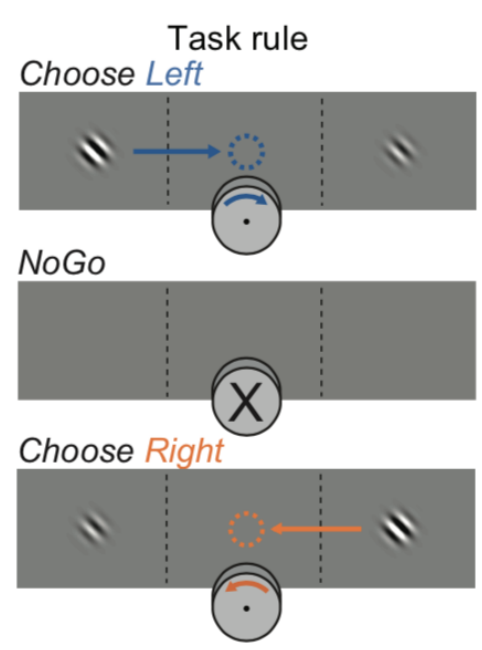

In [ ]:
# @markdown Execute to see schematic
import IPython
IPython.display.Image("http://kordinglab.com/images/others/steinmetz-task.png")

Today we're going to **decode the decision from neural data** using Logistic Regression. We will only consider trials where the mouse chose "Left" or "Right" and ignore NoGo trials.

### Data format

In the hidden `Data retrieval and loading` cell, there is a function that loads the data:

- `spikes`: an array of normalized spike rates with shape `(n_trials, n_neurons)`
- `choices`: a vector of 0s and 1s, indicating the animal's behavioural response, with length `n_trials`.

In [ ]:
data = load_steinmetz_data()
for key, val in data.items():
  print(key, val.shape)

spikes (276, 691)
choices (276,)


As with the GLMs you've seen in the previous tutorial (Linear and Poisson Regression), we will need two data structures:

- an `X` matrix with shape `(n_samples, n_features)`
- a `y` vector with length `n_samples`.

In the previous notebook, `y` corresponded to the neural data, and `X` corresponded to something about the experiment. Here, we are going to invert those relationships. That's what makes this a *decoding* model: we are going to predict behaviour (`y`) from the neural responses (`X`):

In [ ]:
y = data["choices"]
X = data["spikes"]

## Section 2.2: Fitting the model

*Estimated timing to here from start of tutorial: 25 min*

Using a Logistic Regression model within `scikit-learn` is very simple.

In [ ]:
# Define the model
log_reg = LogisticRegression(penalty="none")

# Fit it to data
log_reg.fit(X, y)

There's two steps here:

- We *initialized* the model with a hyperparameter, telling it what penalty to use (we'll focus on this in the second part of the notebook)
- We *fit* the model by passing it the `X` and `y` objects.



## Section 2.3: Classifying the training data

*Estimated timing to here from start of tutorial: 27 min*

Fitting the model performs maximum likelihood optimization, learning a set of *feature weights*. We can use those learned weights to *classify* new data, or predict the labels for each sample:

In [ ]:
y_pred = log_reg.predict(X)

## Section 2.4: Evaluating the model

*Estimated timing to here from start of tutorial: 30 min*

Now we need to evaluate the model's predictions. We'll do that with an *accuracy* score. The accuracy of the classifier is the proportion of trials where the predicted label matches the true label.


### Coding Exercise 2.4: Classifier accuracy

For the first exercise, implement a function to evaluate a classifier using the accuracy score. Use it to get the accuracy of the classifier on the *training* data.

In [ ]:
def compute_accuracy(X, y, model):
  """Compute accuracy of classifier predictions.

  Args:
    X (2D array): Data matrix
    y (1D array): Label vector
    model (sklearn estimator): Classifier with trained weights.

  Returns:
    accuracy (float): Proportion of correct predictions.
  """
  #############################################################################
  # TODO Complete the function, then remove the next line to test it
  raise NotImplementedError("Implement the compute_accuracy function")
  #############################################################################

  y_pred = model.predict(X)

  accuracy = ...

  return accuracy


# Compute train accuracy
train_accuracy = compute_accuracy(X, y, log_reg)
print(f"Accuracy on the training data: {train_accuracy:.2%}")

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/main/tutorials/W1D3_GeneralizedLinearModels/solutions/W1D3_Tutorial2_Solution_bfe654b0.py)



In [ ]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Classifier_accuracy_Video")

## Section 2.5: Cross-validating the classifier

*Estimated timing to here from start of tutorial: 40 min*

Classification accuracy on the training data is 100%! That might sound impressive, but you should recall from yesterday the concept of *overfitting*: the classifier may have learned something idiosyncratic about the training data. If that's the case, it won't have really learned the underlying data->decision function, and thus won't generalize well to new data.

To check this, we can evaluate the *cross-validated* accuracy.


In [ ]:
# @markdown Execute to see schematic
import IPython
IPython.display.Image("http://kordinglab.com/images/others/justCV-01.png")

### Cross-validating using `scikit-learn` helper functions

Yesterday, we asked you to write your own functions for implementing cross-validation. In practice, this won't be necessary, because `scikit-learn` offers a number of [helpful functions](https://scikit-learn.org/stable/model_selection.html) that will do this for you. For example, you can cross-validate a classifier using `cross_val_score`.

`cross_val_score` takes a `sklearn` model like `LogisticRegression`, as well as your `X` and `y` data. It then retrains your model on test/train splits of `X` and `y`, and returns the test accuracy on each of the test sets.

In [ ]:
accuracies = cross_val_score(LogisticRegression(penalty='none'), X, y, cv=8)  # k=8 cross validation

In [ ]:
#@title
#@markdown Run to plot out these `k=8` accuracy scores.
f, ax = plt.subplots(figsize=(8, 3))
ax.boxplot(accuracies, vert=False, widths=.7)
ax.scatter(accuracies, np.ones(8))
ax.set(
  xlabel="Accuracy",
  yticks=[],
  title=f"Average test accuracy: {accuracies.mean():.2%}"
)
ax.spines["left"].set_visible(False)

The lower cross-validated accuracy compared to the training accuracy (100%) suggests that the model is being *overfit*. Is this surprising? Think about the shape of the $X$ matrix:

In [ ]:
X.shape

The model has almost three times as many features as samples. This is a situation where overfitting is very likely (almost guaranteed).

**Link to neuroscience**: Neuro data commonly has more features than samples. Having more neurons than independent trials is one example. In fMRI data, there are commonly more measured voxels than independent trials.


### Why more features than samples leads to overfitting

In brief, the variance of model estimation increases when there are more features than samples. That is, you would get a very different model every time you get new data and run `.fit()`. This is very related to the *bias/variance tradeoff* you learned about on day 1.

Why does this happen? Here's a tiny example to get your intuition going. Imagine trying to find a best-fit line in 2D when you only have 1 datapoint. There are simply an infinite number of lines that pass through that point. This is the situation we find ourselves in with more features than samples.

### What we can do about it
As you learned on day 1, you can decrease model variance if you don't mind increasing its bias. Here, we will increase bias by assuming that the correct parameters are all small. In our 2D example, this is like preferring the horizontal line to all others. This is one example of *regularization*.

---
# Notation

\begin{align}
x &\quad \text{input}\\
y &\quad \text{measurement, response}\\
\theta &\quad \text{parameter}\\
\sigma(z) &\quad \text{logistic function}\\
C &\quad \text{inverse regularization strength parameter}\\
\beta &\quad \text{regularization strength parameter}\\
\hat{y} &\quad \text{estimated output}\\
\mathcal{L}(\theta| y_i, x_i) &\quad \text{likelihood of that parameter } \theta \text{ producing response } y_i \text{ from input } x_i\\
L_1 &\quad \text{Lasso regularization}\\
L_2 &\quad \text{ridge regularization}\\
\end{align}

---
# Bonus


## Bonus Section 1: The Logistic Regression model in full

The fundamental input/output equation of logistic regression is:

\begin{equation}
p(y_i = 1 |x_i, \theta) = \sigma(\theta^\top x_i)
\end{equation}

**The logistic link function**

You've seen $\theta^T x_i$ before, but the $\sigma$ is new. It's the *sigmoidal* or *logistic* link function that "squashes" $\theta^T x_i$ to keep it between $0$ and $1$:

\begin{equation}
\sigma(z) = \frac{1}{1 + \textrm{exp}(-z)}
\end{equation}

**The Bernoulli likelihood**

You might have noticed that the output of the sigmoid, $\hat{y}$ is not a binary value (0 or 1), even though the true data $y$ is! Instead, we interpret the value of $\hat{y}$ as the *probability that y = 1*:

\begin{equation}
\hat{y_i} \equiv p(y_i=1|x_i,\theta) = \frac{1}{{1 + \textrm{exp}(-\theta^\top x_i)}}
\end{equation}

To get the likelihood of the parameters, we need to define *the probability of seeing $y$ given $\hat{y}$*. In logistic regression, we do this using the Bernoulli distribution:

\begin{equation}
P(y_i\ |\ \hat{y}_i) = \hat{y}_i^{y_i}(1 - \hat{y}_i)^{(1 - y_i)}
\end{equation}

So plugging in the regression model:

\begin{equation}
P(y_i\ |\ \theta, x_i) = \sigma(\theta^\top x_i)^{y_i}\left(1 - \sigma(\theta^\top x_i)\right)^{(1 - y_i)}.
\end{equation}

This expression effectively measures how good our parameters $\theta$ are. We can also write it as the likelihood of the parameters given the data:

\begin{equation}
\mathcal{L}(\theta\ |\ y_i, x_i) = P(y_i\ |\ \theta, x_i),
\end{equation}

and then use this as a target of optimization, considering all of the trials independently:

\begin{equation}
\log\mathcal{L}(\theta | X, y) = \sum_{i=1}^Ny_i\log\left(\sigma(\theta^\top x_i)\right)\ +\ (1-y_i)\log\left(1 - \sigma(\theta^\top x_i)\right).
\end{equation}

## Bonus Section 2: More detail about model selection

In the final exercise, we used all of the data to choose the hyperparameters. That means we don't have any fresh data left over to evaluate the performance of the selected model. In practice, you would want to have two *nested* layers of cross-validation, where the final evaluation is performed on data that played no role in selecting or training the model.

Indeed, the proper method for splitting your data to choose hyperparameters can get confusing. Here's a guide that the authors of this notebook developed while writing a tutorial on using machine learning for neural decoding [arxiv:1708.00909](https://arxiv.org/abs/1708.00909).

In [ ]:
# @markdown Execute to see schematic
import IPython
IPython.display.Image("http://kordinglab.com/images/others/CV-01.png")